In [1]:
#viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot evolution of viscous ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
#
#
#drop nans
for idx in range(len(times)):
    if (r[idx,:,:].sum() > 0):
        pass
    else:
        break
idx -= 10
print idx
times = times[0:idx]
r = r[0:idx, :, :]
t = t[0:idx, :, :]
vr = vr[0:idx, :, :]
vt = vt[0:idx, :, :]
total_number_of_outputs = len(times)
#
#
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'initial_orbits = ', initial_orbits
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

990
r.shape =  (990, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-11
initial_orbits =  {'w_prime': 0.175, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}
e.min() =  0.0031138905451645977
e.max() =  0.006106675217310718


In [3]:
#calculate da, de, dwt etc at inner & outer streamline's periapse
from libration import *
a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

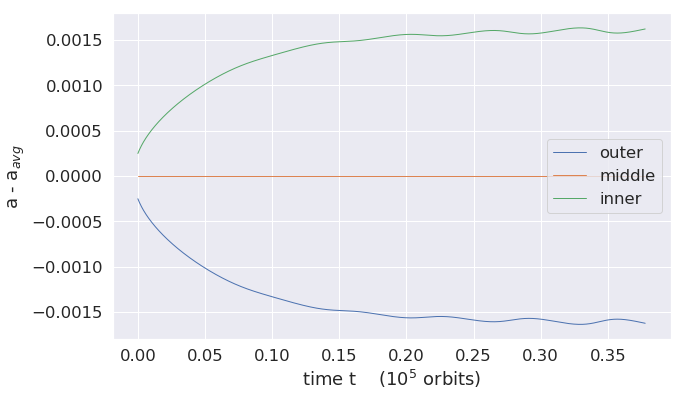

In [5]:
#plot streamline's mutual a-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = a_inner - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='outer')
y = a_avg - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='middle')
y = a_outer - a_avg
p = ax.plot(x, y, linestyle='-', linewidth=1, alpha=1, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('a - a$_{avg}$')
p = plt.legend(loc='center right')

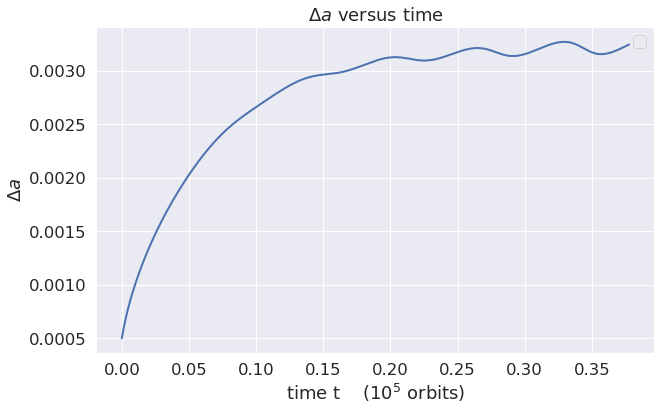

In [6]:
#plot delta_a versus time
x = times/(2*np.pi)/1.0e5
y = delta_a
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta a$')
p = plt.legend()

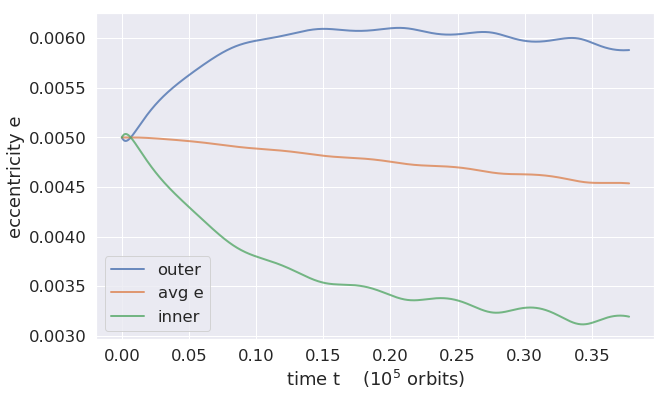

In [7]:
#plot streamline's e-evolution
twopi = 2*np.pi
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='avg e')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel('eccentricity e')
p = plt.legend()

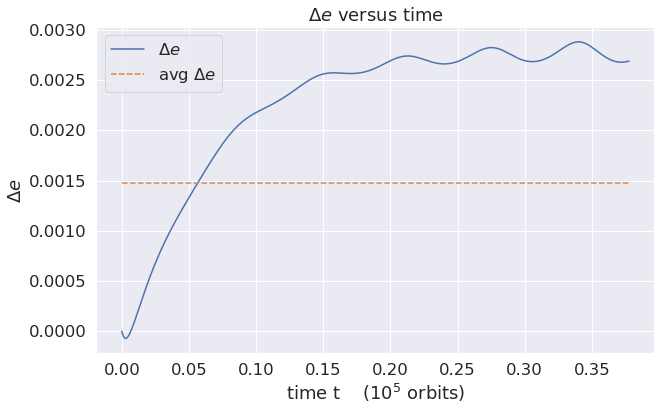

In [8]:
#plot delta_e versus time
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = delta_e
p = ax.plot(x, y, linestyle='-', label=r'$\Delta e$')
y = y*0 + delta_e_avg
p = ax.plot(x, y, linestyle='dashed', label=r'avg $\Delta e$')
p = ax.set_title(r'$\Delta e$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

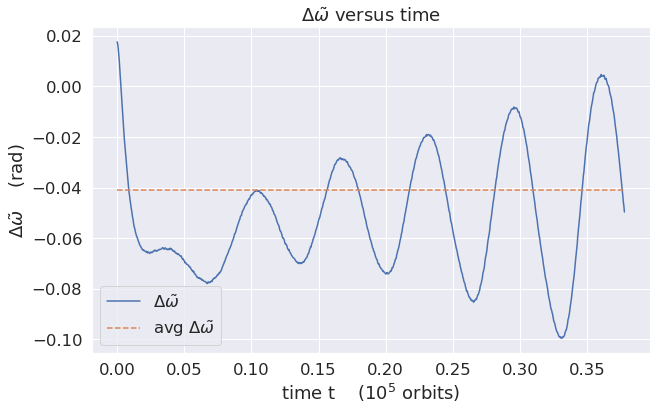

In [9]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', label=r'$\Delta\tilde{\omega}$')
y = y*0 + delta_wt_avg
p = ax.plot(x, y, linestyle='dashed', label=r'avg $\Delta\tilde{\omega}$')
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()

stationary e' =  2.9511921060951782
stationary wt' =  -0.41043351061956884


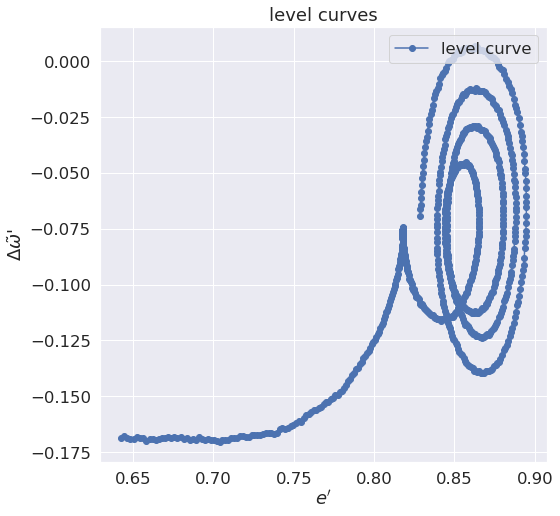

In [10]:
#plot x=delta_e_prime, y=wt_prime over time
f, ax = plt.subplots(figsize=(8, 8))
x = e_prime
y = wt_prime
idx = (times > times.max()/8)
x = x[idx]
y = y[idx]
p = ax.plot(x, y, marker='o', linestyle='-', label='level curve')
p = ax.set_title('level curves')
p = ax.set_xlabel(r"$e'$")
p = ax.set_ylabel(r"$\Delta\tilde{\omega}$'")
p = plt.legend(loc='upper right')
print "stationary e' = ", e_prime_avg[0]
print "stationary wt' = ", wt_prime_avg[0]

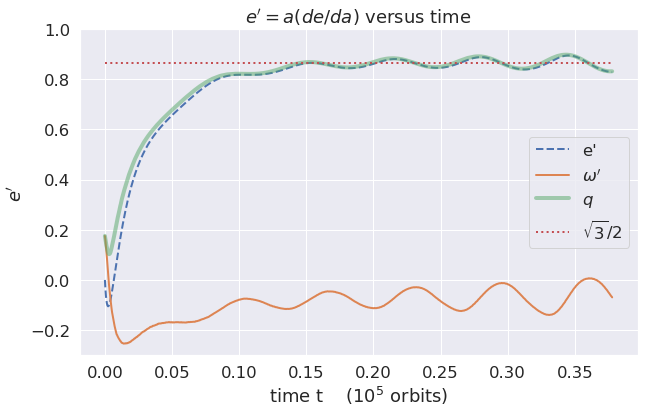

In [11]:
#plot e_prime wt_prime and q versus time
x = times/(2*np.pi)/1.0e5
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.3, 1)
p = plt.legend()

In [12]:
#viscous angular momentum flux & angular momentum luminosity vs time
c = -1.0
G = -1.0
twopi = 2*np.pi
inner_torque_list = []
outer_torque_list = []
viscous_flux_list = []
for t_idx in range(len(times)):
    Ar, At = accelerations(lambda0, G_ring, shear_viscosity, c, r[t_idx], t[t_idx], vt[t_idx])
    viscous_flux = lambda0*r[t_idx]*At
    torque_per_particle = viscous_flux*(twopi*r[t_idx]/particles_per_streamline)
    viscous_flux_list += [viscous_flux]
    inner_torque_list += [torque_per_particle[0].sum()]
    outer_torque_list += [torque_per_particle[1].sum()]
inner_torque = np.array(inner_torque_list)
outer_torque = np.array(outer_torque_list)
viscous_flux = np.array(viscous_flux_list)

In [13]:
#viscous angular momentum flux & luminosity assuming circular ring at time=0
a0 = a_avg[0]
area = twopi*a0*delta_a[0]
sd0 = total_ring_mass/area
w0 = Omega(J2, Rp, a0)
viscous_flux0 = 1.5*shear_viscosity*sd0*a0*w0
viscous_luminosity0 = viscous_flux0*twopi*a0
print 'circular flux, luminosity = ', viscous_flux0, viscous_luminosity0, outer_torque[0]

circular flux, luminosity =  7.172342451522111e-18 4.507642299898337e-17 2.2721009085446952e-17


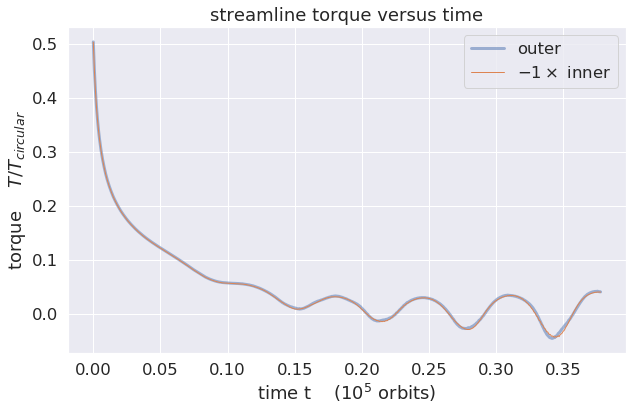

In [14]:
#plot torques versus time...off by X2 at time=0???
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = outer_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, label='outer', alpha=0.5)
y = -inner_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$-1\times$ inner')
p = ax.set_title(r'streamline torque versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'torque    $T/T_{circular}$')
p = plt.legend()

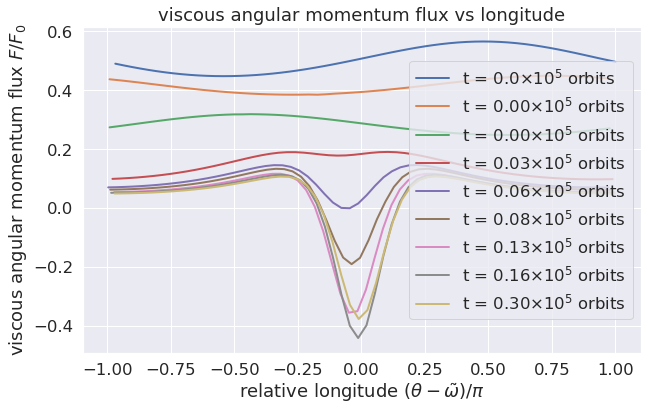

In [15]:
#viscous flux vs longitude...factor of X2 problem???
f, ax = plt.subplots(figsize=(10, 6))
t_idxs = (np.array([0.0, 0.005, 0.02, 0.1, 0.18, 0.23, 0.35, 0.45, 0.8])*total_number_of_outputs)\
    .astype(int)
for t_idx in t_idxs:
    viscous_flux_outer = viscous_flux[t_idx][1]
    r_outer = r[t_idx][1]
    t_outer = t[t_idx][1]
    wt_outer = wt[t_idx][1]
    pidx = r_outer.argmin()
    wt_outer_min = wt_outer[pidx]
    t_rotating = adjust_angle(t_outer - wt_outer_min)
    y = viscous_flux_outer/viscous_flux0
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/twopi/1.0e5
    lbl = r't = ' + str(N_orbits)[0:4] + r'$\times10^5$ orbits'
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_0$')
p = plt.legend(loc='center right')